# Apple Health Mobility Report

Our goal is to build a report with the Apple Health data that can be used by Physical Therapists to assess the progress of their patients. To do this, we selected some exercise metrics that we believe have an impact in maintaining or improving the mobility of people affected by Multiple Sclerosis (MS) or stroke.

1. Distance Cycling
2. Double support time
3. Exercise minutes
4. Six minute walk
5. Stair speed down
6. Stair speed up
7. Step length
8. Walking and running distance
9. Walking assymetry
10. Walking speed
11. Walking steadiness (last 4 weeks)

These metrics are a part of [Apple's Healthkit](https://developer.apple.com/documentation/healthkit) and the user can access them in individual charts. There is no native option on the iPhone and looking at the metrics in separate charts makes it harder to find correlations or justify discrepancies in the data.

This report aims to gather the above metrics in a way that can be analysed further and be more useful to understand the patient's progress. 

To do this we will use the full export of the Apple Health App and [convert it to a Pandas Dataframe using Milind Ganjoo's Apple Health Exporter code](https://github.com/mganjoo/apple-health-exporter).

## Getting the user data to display

1. Export Apple Health data from within the Health app.

![click on "user" icon and then on "export health data"](images/exporting.png)

In [154]:
%%capture

import os 
import sys 

!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install pandas pyarrow
!{sys.executable} -m pip install matplotlib


Proceeding with default values

In [155]:
!{sys.executable} -m pip install apple-health-exporter

from apple_health_exporter import health_xml_to_feather
output_file='patient-data/data.feather'
health_xml_to_feather(zip_file='patient-data/export.zip',output_file=output_file)

import pandas as pd
data = pd.read_feather(output_file)

# Metrics and their respective data types

1. **Distance Cycling** : HKQuantityTypeIdentifierDistanceCycling
2. **Double support time** : HKQuantityTypeIdentifierWalkingDoubleSupportPercentage
3. **Exercise minutes** : HKQuantityTypeIdentifierAppleExerciseTime
4. **Six minute walk** : HKQuantityTypeIdentifierSixMinuteWalkTestDistance
5. **Stair speed down** : HKQuantityTypeIdentifierStairDescentSpeed
6. **Stair speed up** : HKQuantityTypeIdentifierStairAscentSpeed
7. **Step length** : HKQuantityTypeIdentifierWalkingStepLength
8. **Walking and running distance** : HKQuantityTypeIdentifierDistanceWalkingRunning
9. **Walking assymetry** : HKQuantityTypeIdentifierWalkingAsymmetryPercentage 
10. **Walking speed** : HKQuantityTypeIdentifierWalkingSpeed 
11. **Walking steadiness** (last 4 weeks) : HKQuantityTypeIdentifierAppleWalkingSteadiness


## Distance cycling

This value is calculated using the iPhone's GPS every time the user registers a Cycling Workout.


## Double support time 

> This is the percentage of time during a walk that both feet are on the ground. A lower value means you spend more of your walk with your weight on one foot instead of two, which can be a sign of better balance. During a typical walk this measure will fall between 20 and 40%.
>
> Walking requires strength and coordination. Changes in these can affect your balance and two-foot contact time.
>
> Double support time naturally varies with how fast vou walk and the terrain, but may increase with age.
>
> Double support time is recorded automatically on iPhone when you carry your phone near vour waist, such as in a trouser pocket, and walk steadily over flat ground.

**Source:** Apple Health App on iOS 15.4

## Exercise minutes

> Every full minute of movement equal to or
exceeding the intensity of a brisk walk for vou
counts towards our dailv Exercise minutes.

**Source:** Apple Health App on iOS 15.4

## Six minute walk

> This is an estimate of how far you can walk on
flat ground in six minutes based on a week of
vour motion and workout data. The fitter vou
are, the higher this number will be.
>
> This prediction is considered a measure of your
capacity for exercise. Longer distances are
associated with healthier cardiac, respiratory,
circulatory and neuromuscular function, and
may reflect your ability to perform everyday
activities. Improvements in fitness and mobility
can increase our six-minute walk distance.
>
> The standard six-minute walk test measures
the maximum number of metres you can walk
on an unobstructed, flat course doing laps of a
standard length. The test is often given to
those who are recovering from a cardiac or
respiratory condition. You can get a predicted
six-minute walk distance up to 500 metres
using data from a device, such as Apple Watch.

**Source:** Apple Health App on iOS 15.4

## Stair speed down

> This is a measurement of how fast vou walk
down the stairs.
>
> Descending stairs safely is an important
indicator of our overall mobility.
> Descending stairs requires strength and
coordination. Changes in these factors, or pain,
can affect your speed.
> Apple Watch records your vertical speed when
you go down a flight that is at least 3 metres
(10 feet).

**Source:** Apple Health App on iOS 15.4


## Stair speed up 

>This is a measurement of how fast vou walk up
the stairs.
>
> Climbing stairs quickly can be a sign of strong
cardiovascular and musculoskeletal health.
>
> Walking up stairs requires strength,
coordination and aerobic fitness. Changes in
these factors, or pain, can affect your speed.
Apple Watch records your vertical speed when
you go up a flight that is at least 3 metres (10
feet).

**Source:** Apple Health App on iOS 15.4

## Step lenght 

## Walking and running distance

## Walking assymetry

> In a healthy walking pattern, the timing of the steps you take with each foot are very similar. Walking asymmetry is the per cent of time your steps with one foot are faster or slower than the other foot. This means the lower the percentage of asymmetry, the healthier your walking pattern.
>
> Uneven walking patterns, such as limping, can
be a sign of disease, injury or other health
issues. An even or symmetrical walk is often an
important physical theraov goal when
recovering from injury.
> 
> Your iPhone can record walking asymmetry
automaticallv when vou carrv vour phone near
your waist - such as in a pocket - and walk
steadilv on flat ground.

**Source:** Apple Health App on iOS 15.4



## Walking speed



## Walking steadiness

> This is an estimate of your stability while
walking. iPhone calculates Walking Steadiness
using your walking speed, step length, double
support time and walking asymmetry data
that's stored in Health. This provides a sense of
the way you walk.
>
> Your steadiness is also related to your fall risk.
As steadiness goes down, your risk of falling
goes up. Walking Steadiness is not an
indication of how likelv vou are to fall in anv
given moment, but an overall sense of fall risk
in the next 12 months.
> 
> iPhone can automatically record your Walking
Steadiness in Health when you carry your
iPhone in a pocket or holder near our waist.
You can also receive a notification if vour
Walking Steadiness is low or very low. You can
manage these notifications in Health Checklist.

**Source:** Apple Health App on iOS 15.4




First we need to know what sort of data we are working with. The command will show what columns we have in the DataFrame and their data type (dtype).

In [156]:
data.dtypes

type                                        object
sourceName                                  object
unit                                        object
startDate     datetime64[ns, pytz.FixedOffset(60)]
endDate       datetime64[ns, pytz.FixedOffset(60)]
value                                      float64
dtype: object

The `type` column identifies the sort of data that we have available, as listed before in [Metrics and their respective data types](#Metrics-and-their-respective-data-types).

In [157]:
data.groupby("type").size()

type
HKDataTypeSleepDurationGoal                                    1
HKQuantityTypeIdentifierActiveEnergyBurned                715914
HKQuantityTypeIdentifierAppleExerciseTime                  21536
HKQuantityTypeIdentifierAppleStandTime                     20921
HKQuantityTypeIdentifierAppleWalkingSteadiness                27
HKQuantityTypeIdentifierBasalEnergyBurned                 215522
HKQuantityTypeIdentifierBloodAlcoholContent                   11
HKQuantityTypeIdentifierBodyFatPercentage                   2505
HKQuantityTypeIdentifierBodyMass                            2512
HKQuantityTypeIdentifierBodyMassIndex                       3358
HKQuantityTypeIdentifierBodyTemperature                        1
HKQuantityTypeIdentifierDietaryCaffeine                       89
HKQuantityTypeIdentifierDietaryCarbohydrates                 161
HKQuantityTypeIdentifierDietaryEnergyConsumed                163
HKQuantityTypeIdentifierDietaryFatTotal                      130
HKQuantityTypeIdenti

The `sourceName` column contains the name of the App or device that collected the information. We can get the listing of the devices by calling the `unique()` function.

In [158]:
data['sourceName'].unique()

array(['Water Reminder', 'Sync Solver', 'Power Sync', 'Asana Rebel',
       'Health', 'Shortcuts', 'Sonic Screwdriver', 'Chronograph',
       'Sleep Cycle', 'Bruno’s Apple\xa0Watch', 'SonicScrewdriver',
       'Nike Training', 'Today', 'Sleep'], dtype=object)

As a first exercise, we want to get the walking distance for the last 30 days and plot that chart to see if it matches with the user's data on the iPhone. We are calculating per week and using sunday as the start of the week to keep aligned with how the HealthKit shows its charts.

The dataframe contains a column called `sourceName` that indicates where the user entered their data. In our case, the user has an Apple Watch and and iPhone. The `sourceName` value can be either "SonicScrewdriver", the iPhone, or "Chronograph", the Apple Watch.

We want to use the Apple Watch to get the walking distance. Since the user doesn't always carry the iPhone, the pedometer of the Apple Watch is more reliable than the movement chip in the iPhone. 

In this case, the Apple Watch was named `Chronograph` by the user.

In [159]:
apple_watch_name = 'Chronograph'
walking_distance = data.loc[data['type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning'][['startDate','endDate','sourceName','unit','value']]
walking_distance = walking_distance.loc[walking_distance['sourceName']==apple_watch_name]
walking_distance_day=walking_distance.groupby(pd.Grouper(key='startDate', freq='D')).sum()
walking_distance_day

,value
startDate,
2020-09-22 00:00:00+01:00,0.983081
2020-09-23 00:00:00+01:00,2.476899
2020-09-24 00:00:00+01:00,2.774861
2020-09-25 00:00:00+01:00,2.037014
2020-09-26 00:00:00+01:00,6.501673
...,...
2022-03-29 00:00:00+01:00,1.751222
2022-03-30 00:00:00+01:00,3.093462
2022-03-31 00:00:00+01:00,2.847665


We tested the values by looking at them side by side with the charts in the iOS app and they match, apart from the fact that the numbers shown to the user are rounded down.

![](./images/2022-04-03_00.51.09.jpg)

We now want to get the last 30 days of walking distance plotted in a chart.

<AxesSubplot:xlabel='startDate'>

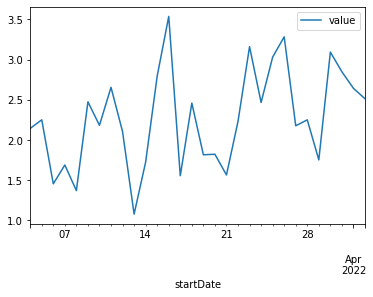

In [160]:
import matplotlib.pyplot as plt

walking_distance_day.last('30D').plot()

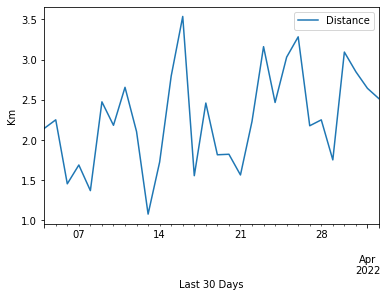

In [161]:
walking_distance_day.last('30D').plot(ylabel='Km',xlabel='Last 30 Days',label='Distance')
L=plt.legend()
L.get_texts()[0].set_text('Distance')

We need to improve the chart to make it readable:
1. Change the label for the X axis
2. Add value label to the Y axis (km)
3. Change legend of the chart from "value" to "Distance"

# Joining related data to assess mobility

https://www.apple.com/ca/healthcare/docs/site/Measuring_Walking_Quality_Through_iPhone_Mobility_Metrics.pdf

## Hypothesis 1, the total distance walked in a day impacts the walking assimetry



Let's use the same principles to get the data for walking asymmetry.
We will try to follow these steps
1. Get walking asymmetry
2. Plot the last 30 days
3. Merge Walking distance + Walking asymmetry

In [162]:

walking_asymmetry = data.loc[data['type'] == 'HKQuantityTypeIdentifierWalkingAsymmetryPercentage']
walking_asymmetry_day=walking_asymmetry.groupby(pd.Grouper(key='startDate', freq='D')).median()
walking_asymmetry['sourceName'].unique()

array(['Sonic Screwdriver', 'SonicScrewdriver'], dtype=object)

In this case, `sourceName` only contains values from the iPhone and we don't need to filter that data.

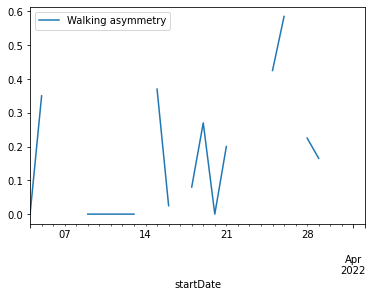

In [163]:
walking_asymmetry_day.last('30D').plot()
L=plt.legend()
L.get_texts()[0].set_text('Walking asymmetry')

In [164]:
walking_distance_day.rename(columns={'value':'Km'},inplace=True)
walking_asymmetry_day.rename(columns={'value':'Walking asymmetry %'}, inplace=True)


<AxesSubplot:xlabel='Day', ylabel='%'>

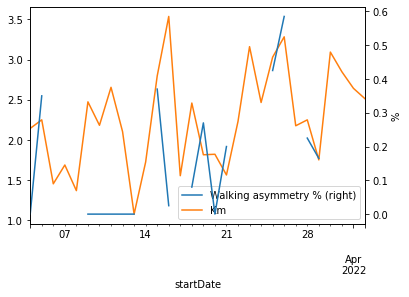

In [166]:
ax=walking_asymmetry_day.last('30D').plot(secondary_y=True)
walking_distance_day.last('30D').plot(ax=ax,ylabel='%',xlabel='Day')

## Hypothesis 2, exercise minutes reduce walking assymetry the next day

## Hypothesis 3, distance cycled decreases walking assymetry 

## Hypothesis 4, too much exercise minutes increase walking assymetry


# LOST+FOUND

how to export to excel

```python
## ARTICLES
articles_json = pd.read_json('data/articles.json')
articles_json.link = articles_json.link.apply(html.unescape)
articles_json.summary = articles_json.summary.apply(html.unescape)
articles_json.to_excel('content/developers/articles_'+ datetime_string + '.xlsx')
```